In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import utils as nn_utils
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(0)
np.random.seed(0)

In [2]:
def generate_line(n, sign = "+"):
    t = torch.linspace(-3, 3, n)
    x = t.view(-1, 1)
    if sign == "+":
        y = t.view(-1, 1)
    else:
        y = -t.view(-1, 1)
    return torch.cat((x, y), dim=1).unsqueeze(0)


def generate_line_small(n, sign = "+"):
    t = torch.linspace(-1, 1, n)
    x = t.view(-1, 1)
    if sign == "+":
        y = t.view(-1, 1)
    else:
        y = -t.view(-1, 1)
    return torch.cat((x, y), dim=1).unsqueeze(0)

def generate_parabola(n, sign = "+"):
    t = torch.linspace(-10, 10, n)
    x = (t).view(-1, 1)
    if sign == "+":
        y =((t**2).view(-1, 1) + 5)/5
    else:
        y = (-(t**2).view(-1, 1) - 5)/5
    return torch.cat((x, y), dim=1).unsqueeze(0)

def generate_circle(n, r = 1):
    t = torch.linspace(0, 2 * torch.pi - 1e-3, n)
    x = (r * torch.cos(t)).view(-1, 1)
    y = (r * torch.sin(t)).view(-1, 1)
    return torch.cat((x, y), dim=1).unsqueeze(0)


def generate_sphere(n, a = 1, b = 1, c = 1):
    t1 = torch.linspace(0, 2*torch.pi - 1e-3, n)
    t2 = torch.linspace(0, torch.pi - 1e-3, n)
    grid_t1, grid_t2 = torch.meshgrid((t1, t2), indexing='ij')
    # t = torch.stack((grid_t1, grid_t2), dim=-1).reshape(-1, 2).to(device)
    x = (a * torch.sin(grid_t1) * torch.cos(grid_t2)).view(-1, 1)
    y = (b * torch.sin(grid_t1) *  torch.sin(grid_t2)).view(-1, 1)
    z = (c * torch.cos(grid_t1)).view(-1, 1)
    return torch.cat((x, y, z), dim=1).unsqueeze(0)

def generate_donut(n, a = 1, b = 1, c = 1):
    t1 = torch.linspace(0, 2*torch.pi - 1e-3, n)
    t2 = torch.linspace(0, 2*torch.pi - 1e-3, n)
    grid_t1, grid_t2 = torch.meshgrid((t1, t2), indexing='ij')
    # t = torch.stack((grid_t1, grid_t2), dim=-1).reshape(-1, 2).to(device)
    x = ((torch.sin(grid_t1) + 2) * torch.cos(grid_t2)).view(-1, 1)
    y = ((torch.sin(grid_t1) + 2) *  torch.sin(grid_t2)).view(-1, 1)
    z = 0.5*(torch.cos(grid_t1)).view(-1, 1)
    return torch.cat((x, y, z), dim=1).unsqueeze(0)

def generate_3D_ellipse(n, r1 = 1, r2 = 0.5):
    t = torch.linspace(0, 2 * torch.pi, n+1)
    x = (r1 * torch.cos(t)).view(-1, 1)[:-1]
    y = (r2 * torch.sin(t)).view(-1, 1)[:-1]
    z = (0 * torch.sin(t)).view(-1, 1)[:-1]
    return torch.cat((x, y, z), dim=1).unsqueeze(0)


def generate_ellipse(n, r1 = 1, r2 = 0.5):
    t = torch.linspace(0, 2*torch.pi, n+1)
    x = (r1 * torch.cos(t)).view(-1, 1)[:-1]
    y = (r2 * torch.sin(t)).view(-1, 1)[:-1]
    return torch.cat((x, y), dim=1).unsqueeze(0)

def generate_data(n, sign = "+"):
    line = generate_line(n, sign)
    line2 = generate_line_small(n, sign = '-')
    parabola = generate_parabola(n, sign)
    parabola1 = generate_parabola(n, sign = '-')
    circle = generate_circle(n)
    circle1 = generate_circle(n, r=2)
    e1 = generate_ellipse(n, r1 = 1.5, r2 = 3)+4
    e2 = generate_ellipse(n, r1 = 4, r2 = 2)
    return torch.concat((e1, e2, line), dim=0)

def plot_data(data, mode = '3D'):
    data = data.to("cpu").detach().numpy()

    if mode == '3D':
        fig = plt.figure(figsize=(15, 5))  # Create a wide figure to accommodate three subplots

        # First subplot
        ax1 = fig.add_subplot(131, projection='3d')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.view_init(elev=20, azim=30)  # Set the viewing angle
        for i in range(data.shape[0]):
            ax1.scatter(data[i, :, 0], data[i, :, 1], data[i, :, 2], alpha=1.0, s=0.5)
        ax1.set_title('View 1')

        # Second subplot
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')
        ax2.view_init(elev=40, azim=60)  # Change the viewing angle
        for i in range(data.shape[0]):
            ax2.scatter(data[i, :, 0], data[i, :, 1], data[i, :, 2], alpha=1.0, s=0.5)
        ax2.set_title('View 2')

        # Third subplot
        ax3 = fig.add_subplot(133, projection='3d')
        ax3.set_xlabel('X')
        ax3.set_ylabel('Y')
        ax3.set_zlabel('Z')
        ax3.view_init(elev=60, azim=90)  # Change the viewing angle again
        for i in range(data.shape[0]):
            ax3.scatter(data[i, :, 0], data[i, :, 1], data[i, :, 2], alpha=1.0, s=0.5)
        ax3.set_title('View 3')

        plt.tight_layout()
        plt.show()
    else:
        for i in range(data.shape[0]):
            plt.scatter(data[i, :, 0], data[i, :, 1], s=1.5)
        plt.show()

In [478]:
class H_theta(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(H_theta, self).__init__()
        self.inp = nn.Linear(input_dim, 25)
        self.relu = nn.ReLU()
        self.out = nn.Linear(25, output_dim)
        # nn.Sequential(
        #     nn.Linear(input_dim, 25),
        #     nn.ReLU(),
        #     # nn.Linear(25, 25),
        #     # nn.ReLU(),
        #     # nn.Linear(25, 25),
        #     # nn.ReLU(),
        #     nn.Linear(25, output_dim)
        # )

    def forward(self, x, disp = False):
        if disp:
            print("Layer 1: \n", self.inp(x))
            print("Layer 2 (Hiddin Layer): \n", self.relu(x))
            print("Layer 1: \n", self.out(x))
        return self.out(self.relu(self.inp(x)))


def generate_NN_latent_functions(num_samples, xdim=1, zdim=2, bias=0):
    class NN(nn.Module):
        def __init__(self, input_dim, output_dim):
            super(NN, self).__init__()
            self.fc1 = nn.Linear(input_dim, 100)
            self.fc2 = nn.Linear(100, 50)
            self.fc3 = nn.Linear(50, 50)
            self.fc4 = nn.Linear(50, output_dim)

            for param in self.parameters():
                param.requires_grad = False

        def forward(self, x):
            with torch.no_grad():
                x = torch.relu(self.fc1(x))
                x = torch.relu(self.fc2(x))
                x = torch.relu(self.fc3(x))
                x = self.fc4(x)
            return x

    #  weight initialization function
    def weights_init_normal(m):
        if isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, mean=0, std=1)
            #nn.init.xavier_normal_(m.weight, gain = 0.5)
            if m.bias is not None:
                nn.init.constant_(m.bias, val=bias)

    #  neural networks
    networks = []
    for _ in range(num_samples):
        net = NN(xdim, zdim)
        net.apply(weights_init_normal)
        networks.append(net)

    return networks



In [158]:
def find_nns(Y, G, disp = False):
    #Y: [1, 1024, 3]
    #G: [20, 1024, 3]

    distances = torch.sum(((Y - G) ** 2), dim = 2).mean(dim = 1)
    min_, min_idx = torch.min(distances, dim=0)
    return min_idx.item()

def f_loss(Y, G):
    weighted_diffs = (G - Y)**2
    diffs = torch.sum(weighted_diffs, dim=2)
    total_loss = diffs.mean(dim=1).mean(dim=0)
    return total_loss

def pos_encoder(x, L):

    _, n = x.shape

    encoding = []

    for i in range(n):
        for l in range(L):
            encoding.append(torch.sin(1.1*(2**l) * torch.pi * x[:, i:i+1]))
            encoding.append(torch.cos(1.1*(2**l) * torch.pi * x[:, i:i+1]))
            # print('L:', l)
            # print('x:',x[:, i:i+1])
            # print('Trig_in: ', 1.1*(2**l) * x[:, i:i+1])
            # print("Sin:")
            # print(torch.sin(1.1*(2**l) * torch.pi * x[:, i:i+1]))
            # print("Cos:")
            # print(torch.cos(1.1*(2**l) * torch.pi * x[:, i:i+1]))
            # print()
    encoded_x = torch.cat(encoding, dim=-1)

    return encoded_x


x = torch.randn(2, 1)  # Example tensor with 10 points in 2D
x = torch.Tensor([[-2],[2]])

encoded_x = pos_encoder(x, L=3)
#print(encoded_t)  # Should print torch.Size([10, 8])
Zs = generate_NN_latent_functions(num_samples=3, xdim=6, zdim=4, bias=1)

Z = (Zs[0](encoded_x))

# print("Z shape: ", Z.shape)
# print("encoded_x shape: ", encoded_x.shape)
# print()
# for i, model in enumerate(Zs):
#     model = model
#     #Zxs[i] = torch.cat((model(z_in), x), dim=1).to(device)
#     Z = (model(encoded_x))
#     print('Positional Encoding for x = -1:' )
#     print(encoded_x[0])
#     print("Output of Z_"+str(i)+" for x = -1:")
#     print(Z[0])
#     print()
#     print('Positional Encoding for x = 1:' )
#     print(encoded_x[1])
#     print("Output of Z_"+str(i)+" for x = 1:")
#     print(Z[1])
#     print('-------------------------------------------------------------------------------')





# tensor1 = torch.randn(1, 1024, 3)
# tensor2 = torch.randn(20, 1024, 3)
# find_nns(tensor1, tensor2)


# encoding.append(torch.sin(1.5*(2**l) * torch.pi * x[:, i:i+1]))
# encoding.append(torch.cos(1.5*(2**l) * torch.pi * x[:, i:i+1]))

In [ ]:
!del /Q /F "plots/*"

In [467]:
epochs = 75
staleness = 500
num_Z_samples = 50
lr = 0.005
num_points = 10
xdim = 1
zdim = 6
output_dim = 2
plot_epoch = 50
param_name = f"staleness_{staleness}_lr_{lr}_zdim_{zdim}_num_points_{num_points}"

In [365]:
if xdim == 1:
    x = torch.linspace(-1, 1, num_points).to(device).unsqueeze(1)
else:
    x1 = torch.linspace(1.0, 2, 40)
    x2 = torch.linspace(1.0, 2, 40)
    grid_x1, grid_x2 = torch.meshgrid((x1, x2), indexing='ij')
    x = torch.stack((grid_x1, grid_x2), dim=-1).reshape(-1, 2).to(device)
data = (generate_data(num_points)).to(device)
print(data.shape)

torch.Size([3, 10, 2])


100%|██████████| 75/75 [00:00<00:00, 205.23it/s]

68th Epoch Paramters
Parameter containing:
tensor([[-0.1751, -0.4075, -1.1484,  0.5352,  0.0309, -0.0630],
        [-0.4306,  0.5622,  0.1499,  0.2196,  0.1710,  0.1405],
        [ 0.1467, -0.3621,  0.0768, -0.3674, -0.0776, -0.2386],
        [ 0.2000, -0.0348,  0.1106, -0.1835, -0.0997,  0.0286],
        [-0.4519,  0.2359, -0.4620,  0.2563,  0.2580,  0.2708],
        [-0.1734,  0.4518, -0.2982, -0.1881,  0.0104, -0.3175],
        [ 0.3628,  0.2355,  0.0537, -0.5405,  0.4588,  0.0358],
        [ 0.0038, -0.0154, -0.3341,  0.1775,  0.2367,  0.0193],
        [-0.1324, -0.0701, -0.3766, -0.2072,  0.2272, -0.0922],
        [ 0.1951,  0.1977, -0.3116, -0.5213,  0.4487,  0.8243],
        [-0.1273,  0.4490,  0.0721,  0.1808,  0.0645,  0.2078],
        [-0.0111, -0.0733, -0.3114, -0.4852,  0.1251, -0.0818],
        [ 0.3198, -0.2368, -0.1432, -0.0353,  0.1381,  0.1043],
        [-0.4045,  0.3426, -0.0717, -0.3972,  0.1629,  0.0062],
        [ 0.1743, -0.0632, -0.4816,  0.3492, -0.1921,  0.2658

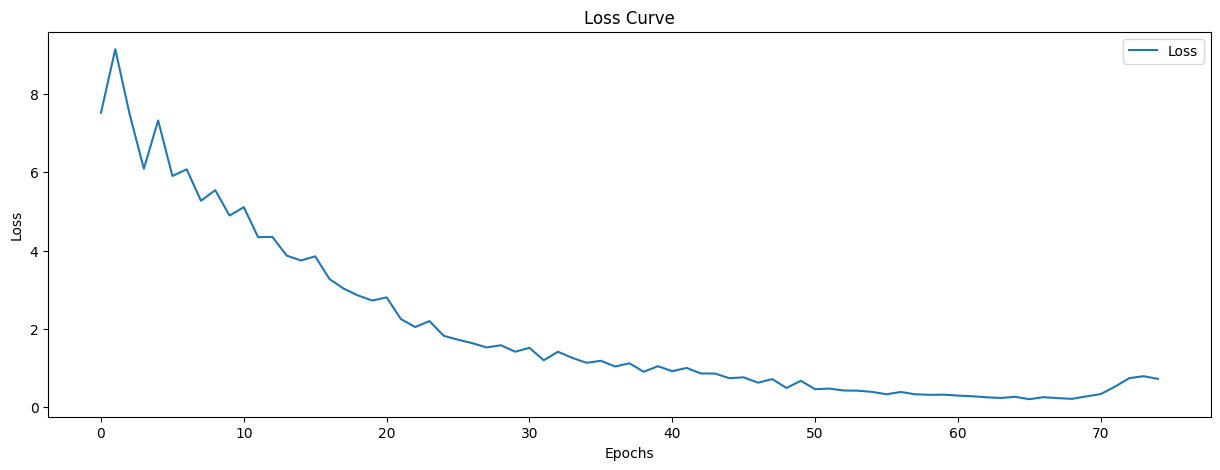

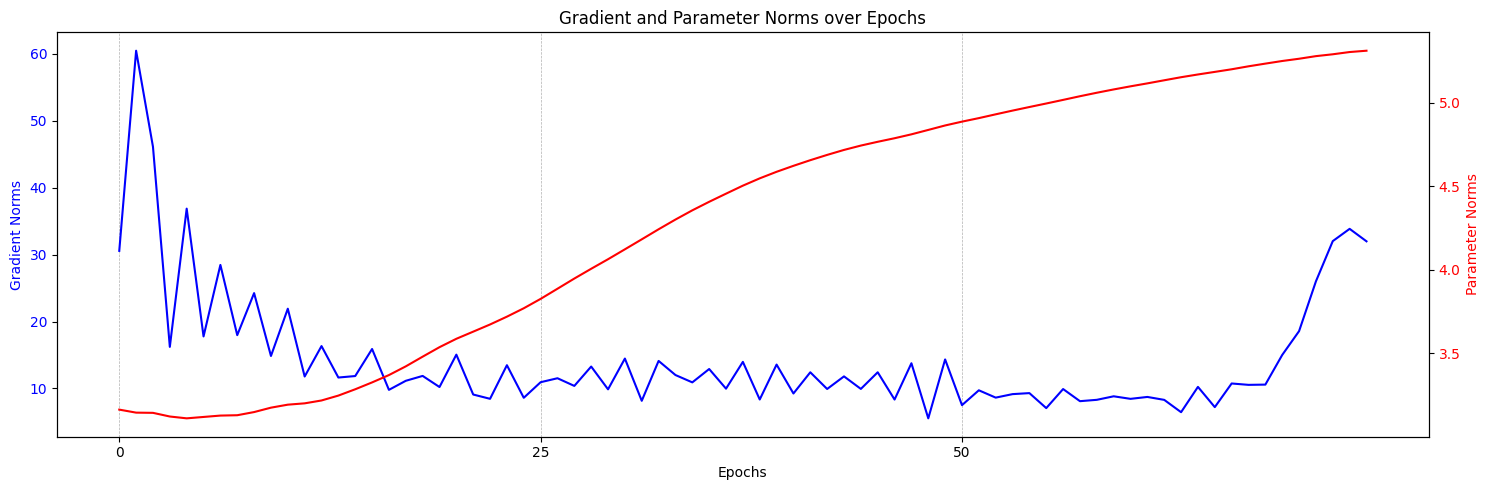

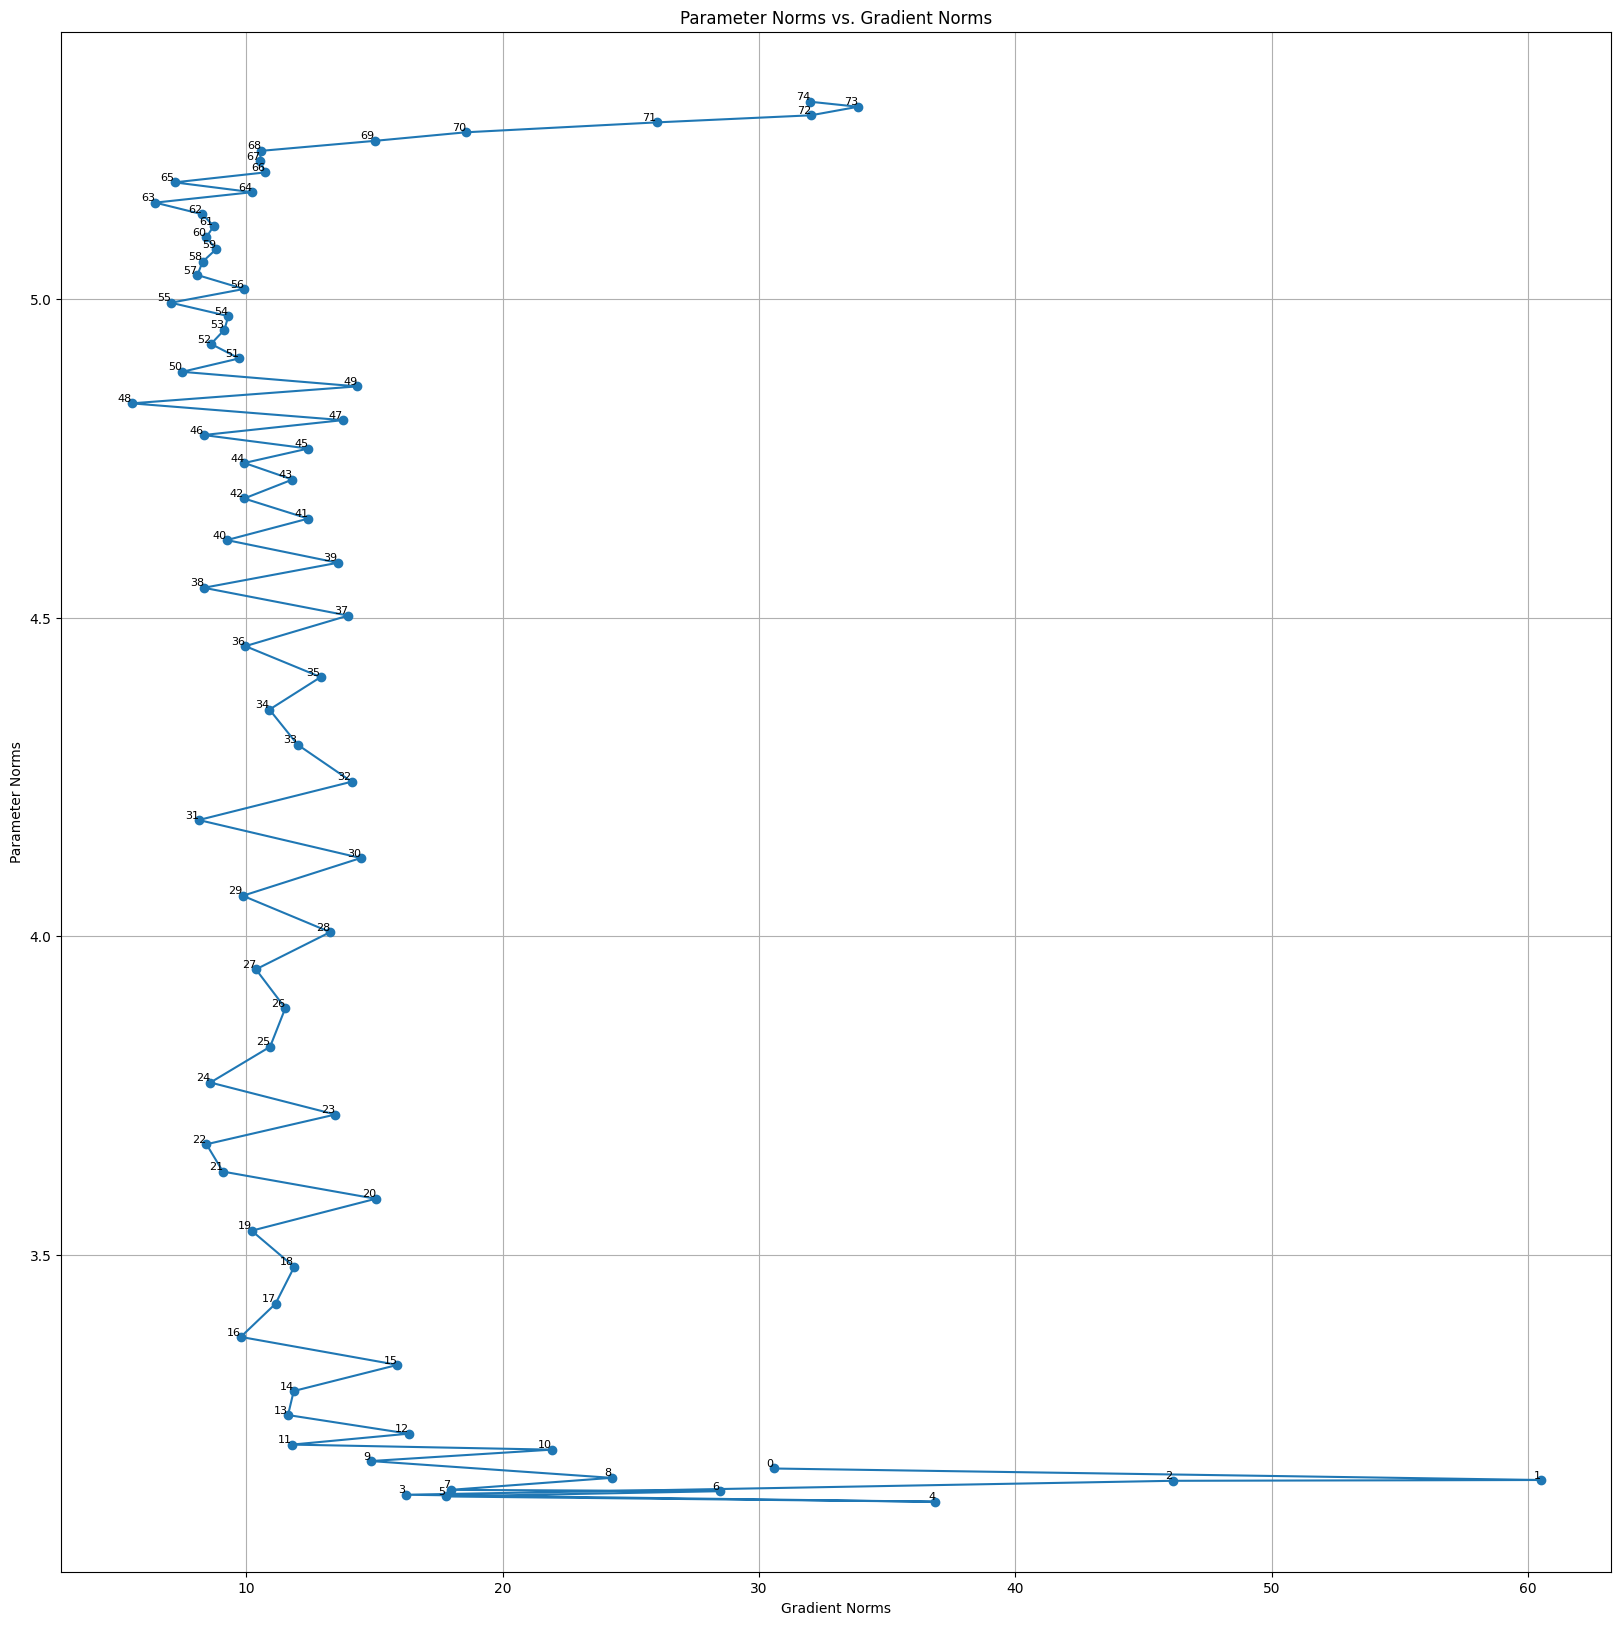

In [ ]:
torch.manual_seed(1)
np.random.seed(1)
# Initialize the model and optimizer
H_t = H_theta(input_dim=zdim, output_dim=output_dim).to(device)
#optimizer = optim.Adam(H_t.parameters(), lr=lr, betas=(0.9, 0.99))
optimizer = optim.SGD(H_t.parameters(), lr=lr, momentum=0.95)

gamma = 0.86
scheduler = optim.lr_scheduler.StepLR(optimizer, gamma=gamma, step_size=50)

os.makedirs('plots/'+param_name, exist_ok=True)

# Initialize lists to store gradient and parameter norms
grad_norms = []
param_norms = []
losses = []
for e in tqdm(range(epochs)):
    # Check if we need to update the stored model parameters
    if e == 0:

        Zxs = torch.empty((num_Z_samples, num_points, zdim)).to(device)
        z_in = pos_encoder(x, L=8)

        Zs = generate_NN_latent_functions(num_samples=num_Z_samples, xdim=z_in.shape[1], zdim=zdim, bias=1)
        for i, model in enumerate(Zs):
            model = model.to(device)
            Zxs[i] = (model(z_in)/100).to(device)

        # Generate output using current model state
        generated = H_t(Zxs).to(device)

        # Find nearest neighbors for data
        imle_nns = [find_nns(d, generated) for d in data]
        imle_transformed_points = torch.empty((data.shape[0], num_points, zdim)).to(device)

        # perturbed_Zs = []
        # for i, index in enumerate(imle_nns):
        #     temp_Z = generate_NN_latent_functions(num_samples=num_Z_samples, xdim=z_in.shape[1], zdim=zdim, bias=1)[0].to(device)
        #     temp_Z.load_state_dict({key: value + (torch.randn(value.shape).to(device))*0.00001 for (key, value) in Zs[index].state_dict().items()})
        #     perturbed_Zs.append(temp_Z)

        # for i, Z in enumerate(perturbed_Zs):
        #     Z = Z.to(device)
        #     z = Z(z_in)
        #     imle_transformed_points[i] = (z)

        for i, index in enumerate(imle_nns):
            imle_transformed_points[i] = Zxs[index]

    # Zero gradients, calculate loss, backpropagate, and update weights
    optimizer.zero_grad()
    outs = H_t(imle_transformed_points)
    loss = f_loss(data, outs)
    losses.append(loss.item())

    # Visualize generated points and save plots
    if e % plot_epoch == 0:
        generated_disp = generated.to(device='cpu').detach().numpy()
        outs_disp = outs.to(device='cpu').detach().numpy()
        points_disp = data.to(device='cpu').detach().numpy()

        plt.plot(outs_disp[0, :, 0], outs_disp[0, :, 1], c='blue', marker='+')
        plt.plot(outs_disp[1, :, 0], outs_disp[1, :, 1], c='orange', marker='+')
        plt.plot(outs_disp[2, :, 0], outs_disp[2, :, 1], c='red', marker='+')
        plt.scatter(points_disp[0, :, 0], points_disp[0, :, 1], c='blue', marker='x')
        plt.scatter(points_disp[1, :, 0], points_disp[1, :, 1], c='orange', marker='x')
        plt.scatter(points_disp[2, :, 0], points_disp[2, :, 1], c='red', marker='x')

        #plt.show()
        #Save the figutes
        plt.savefig(f"plots/{param_name}/epoch_{e}.png")
        #Close plts
        plt.close()
    #     print(loss)


    loss.backward()

    # nn_utils.clip_grad_norm_(H_t.parameters(), max_norm=17.5)
    # if e >= 75:
    #     nn_utils.clip_grad_norm_(H_t.parameters(), max_norm=5)
    # else:
    #nn_utils.clip_grad_norm_(H_t.parameters(), max_norm=40)
    # Calculate and store the norms of parameters and gradients
    grad_sum = 0
    param_sum = 0
    for param in H_t.parameters():
        param_sum += torch.norm(param)**2
        grad_sum += torch.norm(param.grad)**2


    if e == 68:
        print("68th Epoch Paramters")
        H_t(imle_transformed_points, disp = True)
        for param in H_t.parameters():
            print(param)
    if e == 69:
        print("69th Epoch Paramters")
        H_t(imle_transformed_points, disp = True)
        for param in H_t.parameters():
            print(param)


    grad_norm = torch.sqrt(grad_sum).item()
    param_norm = torch.sqrt(param_sum).item()
    grad_norms.append(grad_norm)
    param_norms.append(param_norm)

    # print("Gradient Norm:", grad_norm)
    # print("Parameter Norm:", param_norm)

    optimizer.step()
    scheduler.step()

print(f"{e+1} Epoch loss: {losses[-1]}")
# print(f"200 Epoch loss: {losses[199]}")
# print(f"100 Epoch loss: {losses[99]}")
# print(f"50 Epoch loss: {losses[49]}")

# Plot the loss curve on a separate figure
plt.figure(figsize=(15, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig(f'plots/{param_name}/Loss Curve.png')
#plt.xticks(np.arange(0, 75), 1)
plt.show()

# Plot gradient norms and parameter norms with dual y-axes

fig, ax1 = plt.subplots(figsize=(15, 5))
# Plot gradient norms on the primary y-axis
ax1.plot(grad_norms, color='blue', label="Gradient Norms")
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Gradient Norms', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(np.arange(0, len(grad_norms), 25))
# Create a secondary y-axis for parameter norms
ax2 = ax1.twinx()
ax2.plot(param_norms, color='red', label="Parameter Norms")
ax2.set_ylabel('Parameter Norms', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout adjustments
plt.title('Gradient and Parameter Norms over Epochs')

ax1.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
fig.tight_layout()
plt.savefig(f'plots/{param_name}/ParamNorm vs GradNorm vs Epochs.png')
plt.show()



plt.figure(figsize=(20, 20))
plt.plot(grad_norms, param_norms, marker='o')
plt.xlabel('Gradient Norms')
plt.ylabel('Parameter Norms')

plt.title('Parameter Norms vs. Gradient Norms')
plt.grid(True)
for i, (grad, param) in enumerate(zip(grad_norms, param_norms)):
    plt.text(grad, param, str(i), fontsize=8, ha='right', va='bottom')
plt.savefig(f'plots/{param_name}/ParamNorm vs GradNorm.png')
plt.show()






In [ ]:
# Generate a range of input values
x = torch.linspace(-1, 1, num_points).to(device).unsqueeze(1)
Zxs = torch.empty((num_Z_samples, num_points, zdim)).to(device)
z_in = pos_encoder(x, L=5)
Zs = generate_NN_latent_functions(num_samples=num_Z_samples, xdim=z_in.shape[1], zdim=zdim, bias=1)

for i, model in enumerate(Zs):
    model = model.to(device)
    Zxs[i] = (model(z_in)/1000).to(device)

with torch.no_grad():
    generated_output = H_t(Zxs)

# Move data to CPU and convert to numpy for plotting
generated_output = generated_output.cpu().numpy()
print(generated_output.shape)


(50, 10, 2)


In [ ]:
import matplotlib.pyplot as plt

for i in range(generated_output.shape[0]):
    plt.figure()
    plt.plot(generated_output[i, :, 0], generated_output[i, :, 1])  # Plot each curve using x and y coordinates
    plt.title(f'Curve {i + 1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


In [ ]:
# lr: 0.00005 loss: 0.13498201966285706
# lr: 0.00001 loss: 0.21987810730934143
# lr = 0.0001 loss = 0.018807683140039444
# lr = 0.0005 loss: 6.182213837746531e-05
# lr = lr = 0.001 loss = 0.1109720915555954

# for

# class H_theta(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(H_theta, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(input_dim, 100),
#             nn.ReLU(),
#             nn.Linear(100, 50),
#             nn.ReLU(),
#             nn.Linear(50, 25),
#             nn.ReLU(),
#             nn.Linear(25, output_dim)
#         )

#     def forward(self, x):
#         return self.fc(x)
